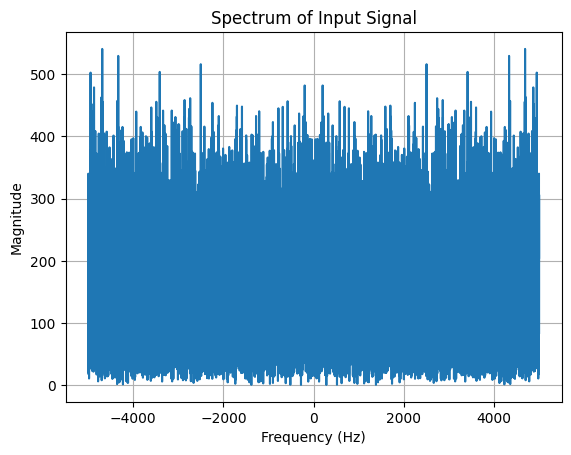

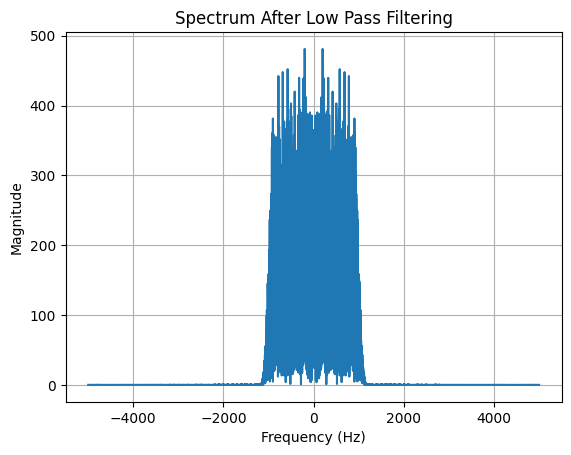

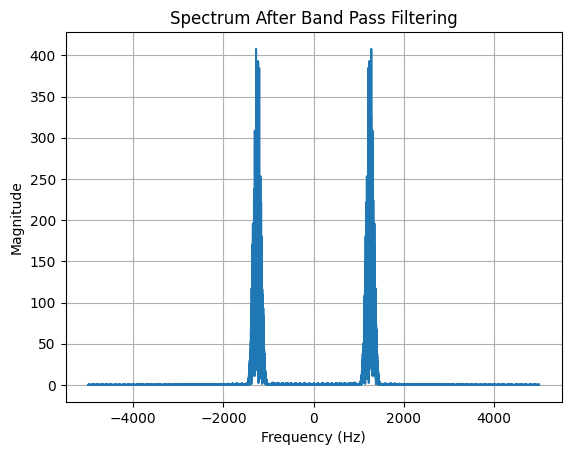

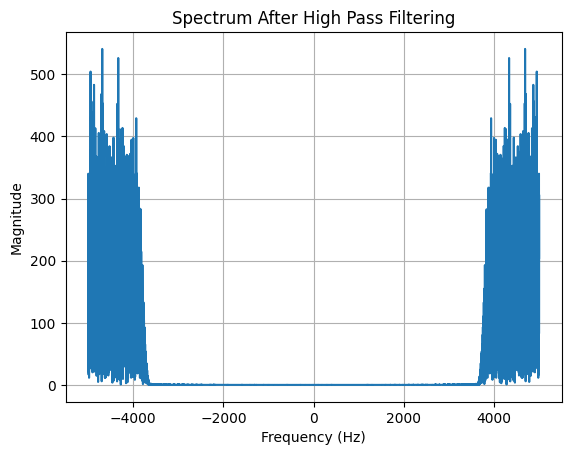

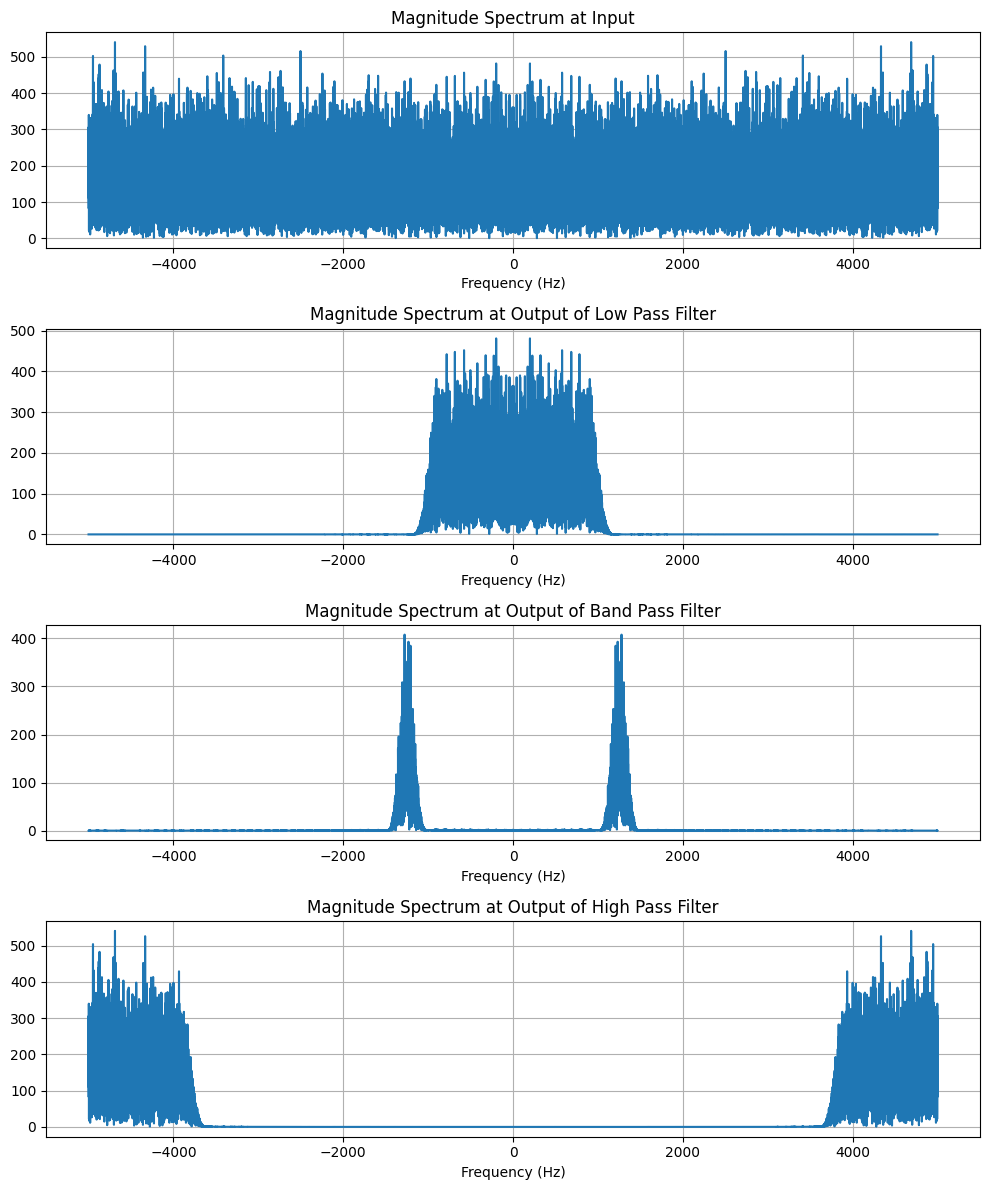

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter
from scipy.fft import fft, fftshift

# Função para plotar espectro (similar ao plotspec do MATLAB)
def plotspec(signal, Ts, title=""):
    N = len(signal)
    ssf = np.fft.fftshift(np.fft.fftfreq(N, Ts))  # Vetor de frequência
    fx = np.fft.fftshift(np.fft.fft(signal))  # FFT do sinal
    plt.figure()
    plt.plot(ssf, np.abs(fx))
    plt.title(title)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.grid()
    plt.show()

# Parâmetros
time = 3  # Duração do sinal
Ts = 1 / 10000  # Intervalo de amostragem
N = int(time / Ts)  # Número de amostras
x = np.random.randn(N)  # Gera o sinal de ruído branco

# Espectro do sinal de entrada
plotspec(x, Ts, title="Spectrum of Input Signal")

# Filtro passa-baixa
b_lp = firwin(101, cutoff=0.2, window="hamming")  # Equivalente ao `remez` LP
ylp = lfilter(b_lp, 1, x)  # Filtragem
plotspec(ylp, Ts, title="Spectrum After Low Pass Filtering")

# Filtro passa-banda
b_bp = firwin(101, [0.24, 0.26], pass_zero=False, window="hamming")  # BP
ybp = lfilter(b_bp, 1, x)  # Filtragem
plotspec(ybp, Ts, title="Spectrum After Band Pass Filtering")

# Filtro passa-alta
b_hp = firwin(101, cutoff=0.76, pass_zero=False, window="hamming")  # HP
yhp = lfilter(b_hp, 1, x)  # Filtragem
plotspec(yhp, Ts, title="Spectrum After High Pass Filtering")

# Espectros para os diferentes filtros
t = np.arange(0, time, Ts)  # Vetor de tempo
ssf = fftshift(np.fft.fftfreq(N, Ts))  # Vetor de frequência

# Espectro do sinal original
fx = fftshift(fft(x))
plt.figure(figsize=(10, 12))

plt.subplot(4, 1, 1)
plt.plot(ssf, np.abs(fx))
plt.xlabel("Frequency (Hz)")
plt.title("Magnitude Spectrum at Input")
plt.grid()

# Espectro do sinal passa-baixa
fyl = fftshift(fft(ylp))
plt.subplot(4, 1, 2)
plt.plot(ssf, np.abs(fyl))
plt.xlabel("Frequency (Hz)")
plt.title("Magnitude Spectrum at Output of Low Pass Filter")
plt.grid()

# Espectro do sinal passa-banda
fybp = fftshift(fft(ybp))
plt.subplot(4, 1, 3)
plt.plot(ssf, np.abs(fybp))
plt.xlabel("Frequency (Hz)")
plt.title("Magnitude Spectrum at Output of Band Pass Filter")
plt.grid()

# Espectro do sinal passa-alta
fyhp = fftshift(fft(yhp))
plt.subplot(4, 1, 4)
plt.plot(ssf, np.abs(fyhp))
plt.xlabel("Frequency (Hz)")
plt.title("Magnitude Spectrum at Output of High Pass Filter")
plt.grid()

plt.tight_layout()
plt.show()
